In [1]:
import pandas as pd
data=pd.read_csv("/Users/abirami/Documents/DATA SCIENCE INTERNSHIP/Dataset .csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [3]:
df=data.copy()
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
df.dropna(subset=['Cuisines'], inplace=True)

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

RELATIONSHIP BETWEEN RESTAURANT RATINGS AND DIFFERENT TYPES OF CUISINES

                                           count   mean   std  min  25%  50%  \
Cuisines                                                                       
Afghani                                      4.0  0.725  1.45  0.0  0.0  0.0   
Afghani, Mughlai, Chinese                    1.0  0.000   NaN  0.0  0.0  0.0   
Afghani, North Indian                        1.0  0.000   NaN  0.0  0.0  0.0   
Afghani, North Indian, Pakistani, Arabian    1.0  0.000   NaN  0.0  0.0  0.0   
African                                      1.0  4.700   NaN  4.7  4.7  4.7   
...                                          ...    ...   ...  ...  ...  ...   
Western, Asian, Cafe                         1.0  4.200   NaN  4.2  4.2  4.2   
Western, Fusion, Fast Food                   1.0  3.200   NaN  3.2  3.2  3.2   
World Cuisine                                1.0  4.900   NaN  4.9  4.9  4.9   
World Cuisine, Mexican, Italian              1.0  4.400   NaN  4.4  4.4  4.4   
World Cuisine, Patisserie, Cafe         

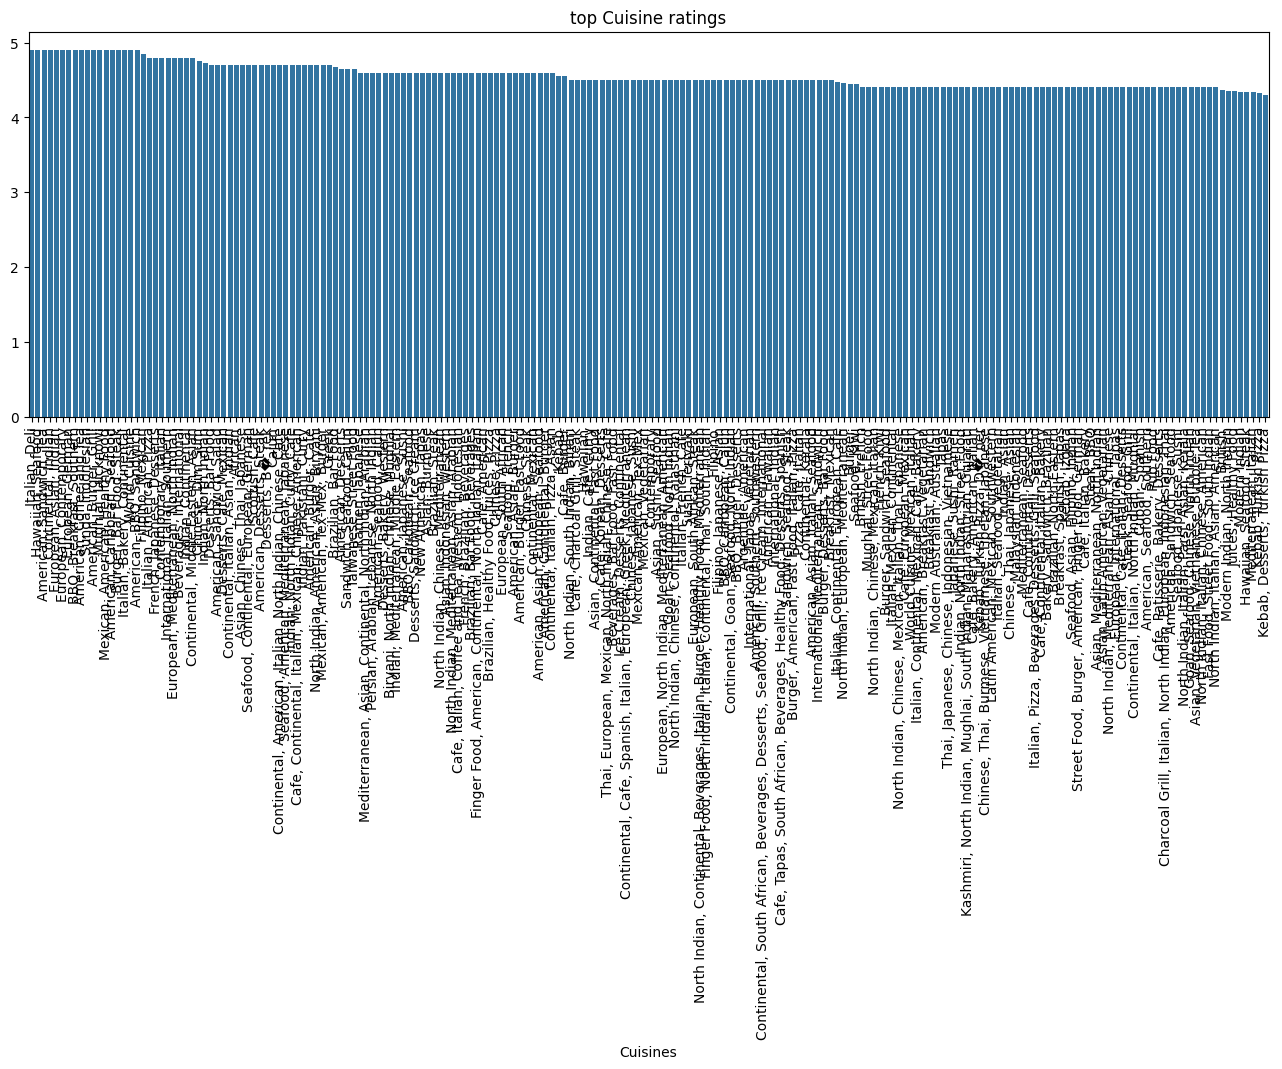

In [25]:
cuisine_rating=df.groupby('Cuisines')['Aggregate rating'].describe()
print(cuisine_rating)

import seaborn as sns
import matplotlib.pyplot as plt
cuisine_rating_mean=df.groupby('Cuisines')['Aggregate rating'].mean()
cuisine_rating_mean=cuisine_rating_mean.sort_values(ascending=False).head(200)
plt.figure(figsize=(16,5))
sns.barplot(x=cuisine_rating_mean.index,y=cuisine_rating_mean.values)
plt.title('top Cuisine ratings')
plt.xticks(rotation=90)
plt.show()

POPULAR CUISINES BASED ON VOTES

In [34]:
popular_cuisine_based_on_votes=df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
popular_cuisine_based_on_votes

Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64

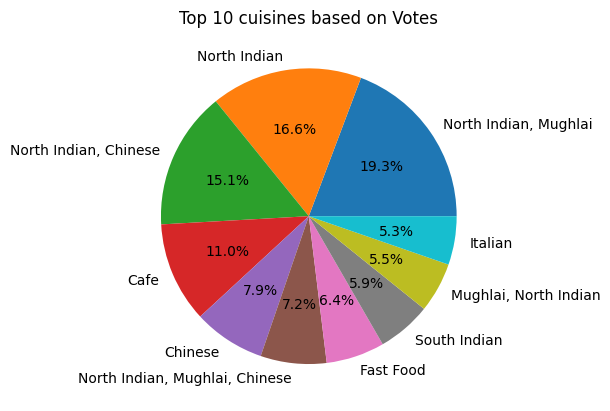

In [33]:
plt.pie(popular_cuisine_based_on_votes.head(10),autopct='%1.1f%%',labels=popular_cuisine_based_on_votes.head(10).index)
plt.title('Top 10 cuisines based on Votes')
plt.show()

CUISINES WITH HIGHER RATINGS

In [37]:
cuisine_rating_sum=df.groupby('Cuisines')['Aggregate rating'].sum().sort_values(ascending=False)
cuisine_rating_sum

Cuisines
North Indian                            1565.3
North Indian, Chinese                   1237.5
North Indian, Mughlai                    964.8
Cafe                                     864.4
Fast Food                                749.9
                                         ...  
Cafe, Fast Food, Bakery                    0.0
Asian, North Indian, Mughlai               0.0
North Indian, Indian                       0.0
North Indian, Lucknowi                     0.0
Greek, Mediterranean, Middle Eastern       0.0
Name: Aggregate rating, Length: 1825, dtype: float64

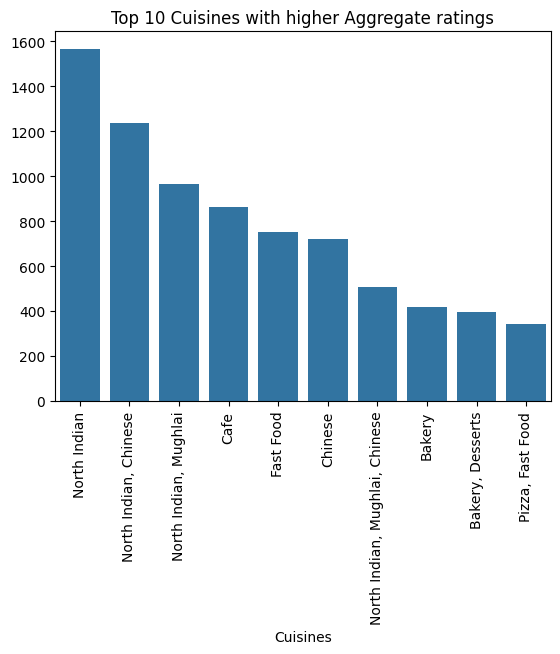

In [42]:
sns.barplot(x=cuisine_rating_sum.head(10).index,y=cuisine_rating_sum.head(10).values)
plt.title('Top 10 Cuisines with higher Aggregate ratings')
plt.xticks(rotation=90)
plt.show()